In [1]:
#Import data packages
import os
import numpy as np
import pandas as pd

#Import plotting packages
import matplotlib.pyplot as plt
from matplotlib.pyplot import specgram
import matplotlib.pyplot as plt
import seaborn as sns

#Import audio packages
import librosa
import librosa.display

#Import Keras & Tensorflow packages
import keras
from keras.models import Sequential
from keras.layers import Dense
from keras.utils import to_categorical
from keras.layers import Flatten, Dropout
from keras.layers import Conv1D
from keras.callbacks import ModelCheckpoint
from sklearn.metrics import confusion_matrix


### Đọc Dataset


In [2]:
raw_data_path = r"C:\Users\Boday\Documents\RealSER\AudioRenoised"

data_list = []
for root, dirs, files in os.walk(raw_data_path):
    for file in files:
        if file.endswith(".wav"):
            file_path = os.path.join(root, file)
            data_list.append(file_path.replace("/", "\\"))

data_list[:10]

['C:\\Users\\Boday\\Documents\\RealSER\\AudioRenoised\\Cáu Giận\\Cáu Giận_Câu 10_Kiên.wav',
 'C:\\Users\\Boday\\Documents\\RealSER\\AudioRenoised\\Cáu Giận\\Cáu Giận_Câu 10_Mỹ.wav',
 'C:\\Users\\Boday\\Documents\\RealSER\\AudioRenoised\\Cáu Giận\\Cáu Giận_Câu 10_Phong.wav',
 'C:\\Users\\Boday\\Documents\\RealSER\\AudioRenoised\\Cáu Giận\\Cáu Giận_Câu 10_Trang cute.wav',
 'C:\\Users\\Boday\\Documents\\RealSER\\AudioRenoised\\Cáu Giận\\Cáu Giận_Câu 10_USA.wav',
 'C:\\Users\\Boday\\Documents\\RealSER\\AudioRenoised\\Cáu Giận\\Cáu Giận_Câu 10_Vân.wav',
 'C:\\Users\\Boday\\Documents\\RealSER\\AudioRenoised\\Cáu Giận\\Cáu Giận_Câu 10_Đức.wav',
 'C:\\Users\\Boday\\Documents\\RealSER\\AudioRenoised\\Cáu Giận\\Cáu Giận_Câu 1_Dung.wav',
 'C:\\Users\\Boday\\Documents\\RealSER\\AudioRenoised\\Cáu Giận\\Cáu Giận_Câu 1_Hùng.wav',
 'C:\\Users\\Boday\\Documents\\RealSER\\AudioRenoised\\Cáu Giận\\Cáu Giận_Câu 1_Hương.wav']

### Phân loại Cảm xúc theo từng file

In [3]:
feeling_list_data = []

emotion_dic = {
    "Cáu Giận": "Cáu Giận",
    "Lạnh Lùng": "Lạnh Lùng",
    "Mệt Mỏi": "Mệt Mỏi",
    "Thân Thiện": "Thân Thiện",
    "Vui Vẻ": "Vui Vẻ"
}

for file_path in data_list:
    file = file_path.split("\\")[-1]
    for keyword, emotion in emotion_dic.items():
        if keyword in file:
            feeling_list_data.append(emotion)
            break

feeling_list_data

['Cáu Giận',
 'Cáu Giận',
 'Cáu Giận',
 'Cáu Giận',
 'Cáu Giận',
 'Cáu Giận',
 'Cáu Giận',
 'Cáu Giận',
 'Cáu Giận',
 'Cáu Giận',
 'Cáu Giận',
 'Cáu Giận',
 'Cáu Giận',
 'Cáu Giận',
 'Cáu Giận',
 'Cáu Giận',
 'Cáu Giận',
 'Cáu Giận',
 'Cáu Giận',
 'Cáu Giận',
 'Cáu Giận',
 'Cáu Giận',
 'Cáu Giận',
 'Cáu Giận',
 'Cáu Giận',
 'Cáu Giận',
 'Cáu Giận',
 'Cáu Giận',
 'Cáu Giận',
 'Cáu Giận',
 'Cáu Giận',
 'Cáu Giận',
 'Cáu Giận',
 'Cáu Giận',
 'Cáu Giận',
 'Cáu Giận',
 'Cáu Giận',
 'Cáu Giận',
 'Cáu Giận',
 'Cáu Giận',
 'Cáu Giận',
 'Cáu Giận',
 'Cáu Giận',
 'Cáu Giận',
 'Cáu Giận',
 'Cáu Giận',
 'Cáu Giận',
 'Cáu Giận',
 'Cáu Giận',
 'Cáu Giận',
 'Cáu Giận',
 'Cáu Giận',
 'Cáu Giận',
 'Cáu Giận',
 'Cáu Giận',
 'Cáu Giận',
 'Cáu Giận',
 'Cáu Giận',
 'Cáu Giận',
 'Cáu Giận',
 'Cáu Giận',
 'Cáu Giận',
 'Cáu Giận',
 'Cáu Giận',
 'Cáu Giận',
 'Cáu Giận',
 'Cáu Giận',
 'Cáu Giận',
 'Cáu Giận',
 'Cáu Giận',
 'Cáu Giận',
 'Cáu Giận',
 'Cáu Giận',
 'Cáu Giận',
 'Cáu Giận',
 'Cáu Giận',
 'Cáu Giận',

In [4]:
#Đưa feeling_list về dạng dataframe
labels_data = pd.DataFrame(feeling_list_data)
labels_data

,0
0,Cáu Giận
1,Cáu Giận
2,Cáu Giận
3,Cáu Giận
4,Cáu Giận
...,...
603,Vui Vẻ
604,Vui Vẻ
605,Vui Vẻ
606,Vui Vẻ


In [5]:
labels_data = labels_data.rename({0: 'emotion'}, axis=1)
labels_data

,emotion
0,Cáu Giận
1,Cáu Giận
2,Cáu Giận
3,Cáu Giận
4,Cáu Giận
...,...
603,Vui Vẻ
604,Vui Vẻ
605,Vui Vẻ
606,Vui Vẻ


In [6]:
#Check shape
labels_data.shape

(608, 1)

In [7]:
labels_data_total = pd.DataFrame(labels_data.groupby(['emotion']).size())
labels_data_total

,0
emotion,
Cáu Giận,118
Lạnh Lùng,127
Mệt Mỏi,118
Thân Thiện,132
Vui Vẻ,113


### Trích xuất đặc trưng âm thanh từ file


In [8]:
#Xử lý Analog Digital Converter
#librosa.core.load(path, sr=22050, mono=True, offset=0.0, duration=None, dtype=<class 'numpy.float32'>, res_type='kaiser_best')
res_type_s = 'kaiser_best'
duration_s = None
sample_rate_s = 16000
offset_s = 0.0

#Xử lý MFCC
#librosa.feature.mfcc(y=None, sr=22050, S=None, n_mfcc=20, dct_type=2, norm='ortho', lifter=0, **kwargs)
# dct_type, lifter
# hop_length, n_fft, win_length
mfcc_sample_rate = 16000
n_mfcc = 40
axis_mfcc = 1
dct_type = 22

In [9]:
rawdata_data = pd.DataFrame(columns=['feature'])
bookmark=0

for y in data_list:
    X, sample_rate = librosa.load(y, 
                                  res_type = res_type_s,
                                  duration = duration_s,
                                  sr = sample_rate_s,
                                  offset=offset_s)
    
    mfccs = librosa.feature.mfcc(   y=X, 
                                    sr = mfcc_sample_rate, 
                                    n_mfcc = n_mfcc)
    mfccs_mean = np.mean(    mfccs, 
                             axis = axis_mfcc)
    feature = mfccs_mean
    rawdata_data.loc[bookmark] = [feature]
    bookmark=bookmark+1

In [10]:
# Kiểm tra shape của rawdata_crema
rawdata_data.shape

(608, 1)

In [11]:
# Kiểm tra sample của rawdata_crema
rawdata_data

,feature
0,"[-438.9461, 45.06231, -2.248651, 19.557795, -3..."
1,"[-465.50046, 95.898476, -3.9241138, -5.250804,..."
2,"[-326.84595, 98.88778, -27.531393, 32.566254, ..."
3,"[-365.46155, 60.646465, 2.6802607, 20.35147, -..."
4,"[-435.97162, 103.51919, 9.876642, 6.947512, -1..."
...,...
603,"[-441.81433, 102.87172, 11.1593, 20.071785, 8...."
604,"[-419.29453, 90.789665, 3.019555, 49.260204, 9..."
605,"[-419.11914, 75.58484, -2.6442788, -8.726639, ..."
606,"[-428.79767, 111.975365, 3.9061828, 4.808619, ..."


In [12]:
#Trả về dạng dataframe
rawdata_data_final = pd.DataFrame(rawdata_data['feature'].values.tolist())

In [13]:
# Kiểm tra shape của rawdata_data_final
rawdata_data_final.shape

(608, 40)

In [14]:
# Kiểm tra lại dữ liệu
rawdata_data_final.head()

,0,1,2,3,4,5,6,7,8,9,...,30,31,32,33,34,35,36,37,38,39
0,-438.946106,45.062309,-2.248651,19.557795,-3.967606,-24.573553,-21.135269,-2.661413,-31.822964,-5.760840,...,-2.630979,-1.377603,-4.667768,-4.002413,-7.334811,-1.338203,-1.780798,-2.896517,-6.621025,-1.986873
1,-465.500458,95.898476,-3.924114,-5.250804,-15.300181,5.976107,4.585829,-20.410440,-14.113144,0.279699,...,10.170302,6.955701,6.076694,5.576103,4.798209,4.406146,1.391365,-1.634140,0.017967,1.576980
2,-326.845947,98.887779,-27.531393,32.566254,-12.240296,-9.463742,-4.807814,-15.199486,2.513178,-13.018202,...,-2.211695,-2.226288,-4.212775,-6.323465,-2.818460,-2.148053,-2.957342,-7.998718,-6.293930,-2.820532
3,-365.461548,60.646465,2.680261,20.351471,-29.968182,-12.438458,-14.718796,-14.725500,-10.504550,-0.548439,...,-2.826209,2.049420,0.392528,-0.202350,-4.111427,-5.576003,-2.382912,-4.320007,-4.822192,0.110427
4,-435.971619,103.519188,9.876642,6.947512,-13.490862,-4.486194,-10.092453,-11.374187,-1.253098,-9.724008,...,-3.498063,0.037018,-1.892666,-2.587189,-4.845578,-2.609209,-5.206359,-2.393736,-1.891766,-1.964734


### Kết hợp đặc trưng và mục tiêu


In [15]:
#Join labels with features
newdf_data = pd.concat([rawdata_data_final,labels_data], axis=1)

In [16]:
newdf_data = newdf_data.rename(index=str, columns={"0": "label"})

In [17]:
newdf_data.shape

(608, 41)

In [18]:
newdf_data.head()

,0,1,2,3,4,5,6,7,8,9,...,31,32,33,34,35,36,37,38,39,emotion
0,-438.946106,45.062309,-2.248651,19.557795,-3.967606,-24.573553,-21.135269,-2.661413,-31.822964,-5.760840,...,-1.377603,-4.667768,-4.002413,-7.334811,-1.338203,-1.780798,-2.896517,-6.621025,-1.986873,Cáu Giận
1,-465.500458,95.898476,-3.924114,-5.250804,-15.300181,5.976107,4.585829,-20.410440,-14.113144,0.279699,...,6.955701,6.076694,5.576103,4.798209,4.406146,1.391365,-1.634140,0.017967,1.576980,Cáu Giận
2,-326.845947,98.887779,-27.531393,32.566254,-12.240296,-9.463742,-4.807814,-15.199486,2.513178,-13.018202,...,-2.226288,-4.212775,-6.323465,-2.818460,-2.148053,-2.957342,-7.998718,-6.293930,-2.820532,Cáu Giận
3,-365.461548,60.646465,2.680261,20.351471,-29.968182,-12.438458,-14.718796,-14.725500,-10.504550,-0.548439,...,2.049420,0.392528,-0.202350,-4.111427,-5.576003,-2.382912,-4.320007,-4.822192,0.110427,Cáu Giận
4,-435.971619,103.519188,9.876642,6.947512,-13.490862,-4.486194,-10.092453,-11.374187,-1.253098,-9.724008,...,0.037018,-1.892666,-2.587189,-4.845578,-2.609209,-5.206359,-2.393736,-1.891766,-1.964734,Cáu Giận


In [19]:
from sklearn.utils import shuffle

#Shuffle dataframe
newdf_data = shuffle(newdf_data)
newdf_data.head(10)

,0,1,2,3,4,5,6,7,8,9,...,31,32,33,34,35,36,37,38,39,emotion
486,-591.570496,99.387947,22.415802,19.892807,-19.308372,-16.156466,-18.247395,-5.127463,-2.094205,0.851511,...,-0.291924,-3.079755,-5.886765,-4.943889,-2.673978,-2.635874,-6.082240,-4.681551,-1.091081,Thân Thiện
124,-518.360413,101.640266,-10.829612,18.566328,-1.867388,1.586667,-2.786687,-0.951916,6.525914,2.778835,...,-4.569047,-5.204760,-4.905367,-5.574724,-3.345450,-2.540421,-3.746533,-3.461307,1.067993,Lạnh Lùng
482,-484.648590,105.929741,14.149144,15.585664,-1.769900,-0.888449,-10.163448,-5.054495,-4.611093,-8.432982,...,-2.288765,-2.801352,-1.872299,-6.326239,-1.870503,-3.805806,-2.251588,-6.464446,0.156061,Thân Thiện
65,-359.712219,82.434280,-49.531788,-7.434660,-22.981737,-13.573792,-21.239340,-1.267126,0.225791,0.197478,...,-2.557203,-1.375377,0.357717,0.072034,-0.511417,-3.312581,-2.899332,-2.196487,-2.040723,Cáu Giận
212,-450.437866,114.747551,15.202025,36.497540,13.459118,2.007853,1.962236,-2.267950,2.713095,5.759667,...,4.828558,1.789945,2.608132,-1.651402,0.392748,-1.895116,-3.091830,-3.408755,-3.513098,Lạnh Lùng
7,-360.571747,58.657001,-22.273256,17.484674,-37.544899,-0.211374,-11.345679,13.905241,-1.290994,0.910449,...,1.262904,-3.720747,-0.447838,-2.492957,-2.265073,-4.432211,0.659631,-0.451298,1.636532,Cáu Giận
368,-554.196777,88.812782,13.903049,27.971695,-16.290419,-4.131841,-5.213850,5.621128,0.907789,2.209983,...,4.693888,-2.791493,-1.168752,-2.778708,-0.665325,-1.065308,-2.276692,-5.510171,-2.239904,Thân Thiện
190,-483.977020,89.125679,19.783495,14.491343,-41.522446,-11.071557,-23.147467,-7.298797,-10.613049,4.003243,...,0.217053,-5.254359,-1.284717,-1.454280,-3.188190,-9.110707,-3.927190,-5.785368,-2.983100,Lạnh Lùng
226,-460.260406,123.885490,22.782829,0.847658,-11.673549,2.818563,-10.445222,-7.243316,-5.584294,-12.570185,...,-1.342569,-1.396732,-1.946083,-4.375437,-5.177822,-5.202068,-3.644176,-4.926127,-1.768545,Lạnh Lùng
214,-427.406952,76.558868,19.989248,11.357963,2.044486,-9.269792,-10.436367,-4.876253,2.879414,-6.711462,...,2.503401,0.364705,1.243667,0.309031,-0.012760,-1.808580,-0.686145,-1.470714,-1.068257,Lạnh Lùng


In [20]:
#Kiểm tra có null values không để đảm bảo
newdf_data.isnull().values.any()

False

In [21]:
# Kiểm tra số lượng cảm xúc trong newdf_crema
newdf_data[newdf_data.columns[-1]].nunique()

5

### Save csv

In [25]:
output_data_path = r'C:\Users\Boday\Documents\RealSER\target\emotion_final_dataframe2_renoise.csv'
newdf_data.to_csv(output_data_path)

### Dividing the data into test and train



In [26]:
#Split features from targets
X = newdf_data.iloc[:,:-1]

#Split targets
y = newdf_data.iloc[:,-1]

In [27]:
from sklearn.model_selection import train_test_split

#Split train & test dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size=0.2, 
                                                    random_state=1)

# Check out the data
print(f'X_train shape: {X_train.shape}')
print(f'y_train shape: {y_train.shape}')
print(f'X_test shape: {X_test.shape}')
print(f'y_test shape: {y_test.shape}')

X_train shape: (486, 40)
y_train shape: (486,)
X_test shape: (122, 40)
y_test shape: (122,)


In [28]:
#Check unique values for y_test
y_test.unique()

array(['Mệt Mỏi', 'Vui Vẻ', 'Thân Thiện', 'Cáu Giận', 'Lạnh Lùng'],
      dtype=object)

In [29]:
#Check unique values for y_train
y_train.unique()

array(['Vui Vẻ', 'Mệt Mỏi', 'Thân Thiện', 'Lạnh Lùng', 'Cáu Giận'],
      dtype=object)

In [30]:
from sklearn.preprocessing import LabelEncoder

lb = LabelEncoder()

# Encode emotion labels into numbers
y_train_lb = to_categorical(lb.fit_transform(y_train))
y_test_lb = to_categorical(lb.transform(y_test))

# Check out the data
print(f'X_train shape: {X_train.shape}')
print(f'y_train shape: {y_train_lb.shape}')
print(f'X_test shape: {X_test.shape}')
print(f'y_test shape: {y_test_lb.shape}')


X_train shape: (486, 40)
y_train shape: (486, 5)
X_test shape: (122, 40)
y_test shape: (122, 5)


In [31]:
#Check encoding
np.unique(y_train_lb, axis=0)

array([[0., 0., 0., 0., 1.],
       [0., 0., 0., 1., 0.],
       [0., 0., 1., 0., 0.],
       [0., 1., 0., 0., 0.],
       [1., 0., 0., 0., 0.]])

In [32]:
# range of x values
print(f'X range: {X_train.min()}-{X_train.max()}')
# y unique values
print(f'y values: {np.unique(y_train_lb)}')
num_classes = len(np.unique(y_train_lb))
print(f'Number of classes: {num_classes}')

X range: 0    -630.018005
1      19.901691
2     -66.412628
3     -27.295788
4     -50.575996
5     -33.179970
6     -33.090874
7     -41.407410
8     -37.988598
9     -28.678141
10    -32.100159
11    -26.956940
12    -22.176868
13    -20.720959
14    -28.554991
15    -15.850887
16    -23.034550
17    -20.056414
18    -17.059509
19    -14.888738
20    -15.956202
21    -13.627349
22    -15.270938
23    -14.153482
24    -10.762698
25    -11.156461
26    -12.952197
27    -10.342565
28    -12.511617
29    -11.180925
30    -11.866589
31     -9.969497
32    -11.115032
33    -10.889743
34    -10.168891
35     -9.756005
36    -10.494885
37    -10.474496
38    -10.635007
39     -8.206098
dtype: float32-0    -232.903549
1     147.547104
2      45.993874
3      66.036217
4      25.856991
5      20.983213
6       9.168965
7      27.990179
8      18.683750
9      13.751261
10     23.169525
11     15.463670
12     10.412648
13     19.578646
14     10.112491
15     13.078707
16      6.629727
17     

### Build list of labels to build confusion matrix after model



In [33]:
#Check encoding labels
lb.classes_

array(['Cáu Giận', 'Lạnh Lùng', 'Mệt Mỏi', 'Thân Thiện', 'Vui Vẻ'],
      dtype=object)

In [34]:
#Build new lists of encoding labels
y_labels_encoded = {}
for i, label in enumerate(lb.classes_):
    y_labels_encoded[i] = label
    
y_labels_encoded

{0: 'Cáu Giận', 1: 'Lạnh Lùng', 2: 'Mệt Mỏi', 3: 'Thân Thiện', 4: 'Vui Vẻ'}

### Scale data for analysis




In [35]:
# from sklearn.preprocessing import StandardScaler
# #Normalize the data
# scaler = StandardScaler()
# scaler.fit(X_train)
# X_train_scalled = scaler.transform(X_train)
# X_test_scalled = scaler.transform(X_test)

### Build model - Convolution Neural Network




Change dimensions for CNN model

In [36]:
#Add dimension for CNN
x_traincnn = np.expand_dims(X_train, axis=2)
x_testcnn = np.expand_dims(X_test, axis=2)

#Check shapes of dataframes
print(x_traincnn.shape)
print(x_testcnn.shape)

(486, 40, 1)
(122, 40, 1)


In [37]:
#Build sequential CNN
CNN_model = Sequential()

#Build first layer
CNN_model.add(Conv1D(16, 5,padding='same',
                 input_shape=(40, 1), activation='relu'))

#Build second layer
CNN_model.add(Conv1D(32, 5,padding='same',activation='relu'))

#Build third layer
CNN_model.add(Conv1D(64, 5,padding='same',activation='relu'))

#Build forth layer
CNN_model.add(Conv1D(128, 5,padding='same',activation='relu'))

#Add dropout
CNN_model.add(Dropout(0.1))

#Flatten 
CNN_model.add(Flatten())

CNN_model.add(Dense(128, activation ='relu'))
CNN_model.add(Dropout(0.1))
CNN_model.add(Dense(64, activation ='relu'))
CNN_model.add(Dense(5, activation='softmax'))

c:\Users\Boday\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [38]:
#Xem lại CNN model summary
CNN_model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv1d (Conv1D)                 │ (None, 40, 16)         │            96 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv1d_1 (Conv1D)               │ (None, 40, 32)         │         2,592 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv1d_2 (Conv1D)               │ (None, 40, 64)         │        10,304 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv1d_3 (Conv1D)               │ (None, 40, 128)        │        41,088 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 40, 128)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 5120)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │       655,488 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 5)              │           325 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 718,149 (2.74 MB)

 Trainable params: 718,149 (2.74 MB)

 Non-trainable params: 0 (0.00 B)

In [39]:
# Compile the model with the desired loss function, optimizer, and metric to optimize
CNN_model.compile(loss = 'categorical_crossentropy',
                  optimizer = 'Adam',
                  metrics = ['accuracy'])

In [43]:

checkpointer = ModelCheckpoint(filepath='saved_models/weights.best.basic_cnn.keras', 
                               verbose=1, save_best_only=True)

# Model fit
cnn_results = CNN_model.fit(x_traincnn, y_train_lb,
              batch_size=64,
              epochs=40,
              verbose=1,
              validation_data=(x_testcnn, y_test_lb),
              callbacks=[checkpointer]) 


Epoch 1/40


6/8 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.9827 - loss: 0.0570
Epoch 1: val_loss improved from inf to 1.04922, saving model to saved_models/weights.best.basic_cnn.keras
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - accuracy: 0.9817 - loss: 0.0588 - val_accuracy: 0.7131 - val_loss: 1.0492
Epoch 2/40
1/8 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - accuracy: 0.9688 - loss: 0.0643
Epoch 2: val_loss improved from 1.04922 to 0.92278, saving model to saved_models/weights.best.basic_cnn.keras
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - accuracy: 0.9870 - loss: 0.0480 - val_accuracy: 0.7541 - val_loss: 0.9228
Epoch 3/40
1/8 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - accuracy: 0.9844 - loss: 0.0524
Epoch 3: val_loss improved from 0.92278 to 0.92107, saving model to saved_models/weights.best.basic_cnn.keras
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - accuracy: 0.9898 - loss: 0.0390 - val_accuracy: 0.7541 - val_loss: 0.9211
Epoch 4/40
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.9963 - loss: 0.0249 
Epoch 4: va

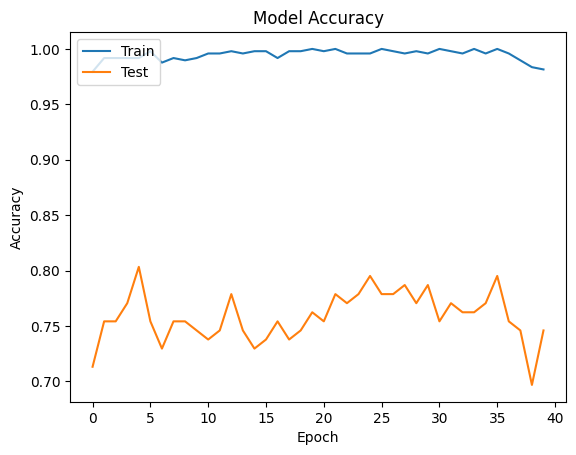

In [44]:
# Plot model accuracy over epochs
plt.plot(cnn_results.history['accuracy'])  
plt.plot(cnn_results.history['val_accuracy'])  
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()


In [45]:
score = CNN_model.evaluate(x_testcnn, y_test_lb, verbose=1)
accuracy = 100*score[1]

print("Pre-training accuracy: %.4f%%" % accuracy) 

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7463 - loss: 0.8701 
Pre-training accuracy: 74.5902%


In [46]:
score = CNN_model.evaluate(x_traincnn, y_train_lb, verbose=0)
print("Training Accuracy: ", score[1])

score = CNN_model.evaluate(x_testcnn, y_test_lb, verbose=0)
print("Testing Accuracy: ", score[1])

Training Accuracy:  0.9979423880577087
Testing Accuracy:  0.7459016442298889


### Add Confusion Matrix




In [47]:
# Get predictions from model
y_test_probabilities = CNN_model.predict(x_testcnn) 
y_test_predictions = np.argmax(y_test_probabilities, axis=1) 


4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step


In [48]:
#Get labels for emotions
y_labels_encoded

{0: 'Cáu Giận', 1: 'Lạnh Lùng', 2: 'Mệt Mỏi', 3: 'Thân Thiện', 4: 'Vui Vẻ'}

In [49]:
# Change predictions to emotions in order to compare
y_test_predictions_labels =[]

#Go through each prediction and append to new list
for e in range(len(y_test_predictions)):
    y_test_predictions_labels.append(y_labels_encoded[y_test_predictions[e]])
    
#Build array of predictions
y_test_predictions_labels = np.array(y_test_predictions_labels)

In [50]:
from sklearn.metrics import confusion_matrix

#Build confusion matrix 
confusion_matrix = confusion_matrix(y_test, y_test_predictions_labels)
confusion_matrix

array([[23,  0,  1,  1,  2],
       [ 0, 17,  3,  2,  3],
       [ 0,  0, 23,  1,  1],
       [ 1,  0,  1, 14,  4],
       [ 8,  1,  1,  1, 14]], dtype=int64)

In [51]:
#Turn al correct answers into 0 to visualize errors better
for i in range(confusion_matrix.shape[0]):
    for j in range(confusion_matrix.shape[1]):
        if i == j:
            confusion_matrix[i,j] = 0

# See results
confusion_matrix

array([[0, 0, 1, 1, 2],
       [0, 0, 3, 2, 3],
       [0, 0, 0, 1, 1],
       [1, 0, 1, 0, 4],
       [8, 1, 1, 1, 0]], dtype=int64)

In [52]:
#Add labels to confusion matrix
confusion_matrix = pd.DataFrame(confusion_matrix, columns=list(y_labels_encoded.values()), index=list(y_labels_encoded.values()))

print("The rows represents the true values or observations")
print("The columns respresent the model's predictions")

confusion_matrix

The rows represents the true values or observations
The columns respresent the model's predictions


,Cáu Giận,Lạnh Lùng,Mệt Mỏi,Thân Thiện,Vui Vẻ
Cáu Giận,0,0,1,1,2
Lạnh Lùng,0,0,3,2,3
Mệt Mỏi,0,0,0,1,1
Thân Thiện,1,0,1,0,4
Vui Vẻ,8,1,1,1,0


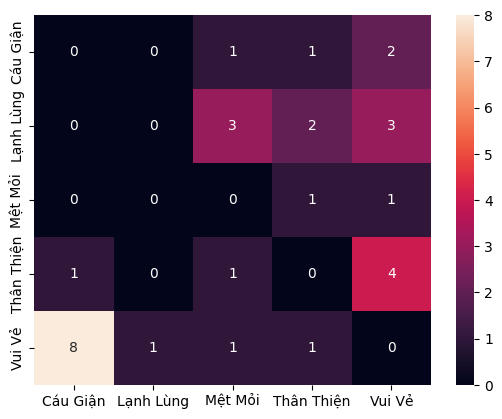

In [53]:
#Plot confusion matrix with results
ax = sns.heatmap(confusion_matrix, annot=True)

### Save CNN Model


In [54]:

# Serialize model to JSON
json_model = CNN_model.to_json()

# Save the model architecture to JSON file 
with open(r'C:\Users\Boday\Documents\RealSER\target\project_emotion_detection_final_version2_renoise.json', 'w') as json_file:
    json_file.write(json_model)

# Saving the weights of the model
CNN_model.save_weights(r'C:\Users\Boday\Documents\RealSER\target\project_emotion_detection_final2_renoise.weights.h5')

# Confirm the saving process
print("Saved model to disk")


Saved model to disk


In [55]:
from keras.models import model_from_json

# Load JSON and create model
json_file_path = r'C:\Users\Boday\Documents\RealSER\target\project_emotion_detection_final_version2_renoise.json'
with open(json_file_path, 'r') as json_file:
    loaded_model_json = json_file.read()

loaded_model = model_from_json(loaded_model_json)

# Load weights into the new model
weights_file_path = r'C:\Users\Boday\Documents\RealSER\target\project_emotion_detection_final2_renoise.weights.h5'
loaded_model.load_weights(weights_file_path)

print("Loaded model from disk")


Loaded model from disk


In [56]:
loaded_model.compile(loss='categorical_crossentropy', optimizer='Adam', metrics=['accuracy'])
score = loaded_model.evaluate(x_testcnn, y_test_lb , verbose=1)
print("%s: %.2f%%" % (loaded_model.metrics_names[1], score[1]*100))

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7463 - loss: 0.8701
compile_metrics: 74.59%


In [57]:
CNN_model.save('saved_models/emotion_detection_model2_renoise.h5')


In [58]:
print("%s: %.2f%%" % (loaded_model.metrics_names[1], score[1]*100))


compile_metrics: 74.59%
